### Import necessary libararys

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Loading

In [3]:
df=pd.read_csv("/content/drive/MyDrive/09_BANK CHAT BOT/BankFAQs.csv")

### Printing First Five Rows of Data

In [4]:
df.head(1000)

,Question,Answer,Class
0,Do I need to enter ‘#’ after keying in my Card...,Please listen to the recorded message and foll...,security
1,What details are required when I want to perfo...,"To perform a secure IVR transaction, you will ...",security
2,How should I get the IVR Password if I hold a...,An IVR password can be requested only from the...,security
3,How do I register my Mobile number for IVR Pas...,Please call our Customer Service Centre and en...,security
4,How can I obtain an IVR Password,By Sending SMS request: Send an SMS 'PWD<space...,security
...,...,...,...
995,What is the Policy term/Premium payment term,Policy Term 10 Year Premium Payment Term Single,insurance
996,Can the plan be offered under limited underwri...,The plan can be applied by filing in the Short...,insurance
997,Do I have option to avail loan under the policy,Policy loans are not allowed.,insurance
998,What happens in case of me wanting to surrende...,"On request for surrender from you, the risk co...",insurance


### Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1764 non-null   object
 1   Answer    1764 non-null   object
 2   Class     1764 non-null   object
dtypes: object(3)
memory usage: 41.5+ KB


### Basic Stats About Data

In [6]:
df.describe().T

,count,unique,top,freq
Question,1764,1334,How can I change the mode of repayment/ accoun...,18
Answer,1764,1440,Post Dated Cheques(PDCs)/Security Cheques subm...,17
Class,1764,7,insurance,469


### Data count of Each class

In [7]:
df['Class'].value_counts()

insurance        469
cards            403
loans            375
accounts         306
investments      140
security          57
fundstransfer     14
Name: Class, dtype: int64

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Splitting Data into Train and Test

In [10]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

### Applying Word embedding Techniques on Features

In [11]:
# Transform the text data into feature vectors
X_train = vectorizer.fit_transform(train_data['Question'])
X_test = vectorizer.transform(test_data['Question'])

### Target

In [12]:
# Define the labels
y_train = train_data['Class']
y_test = test_data['Class']

### Applying SVC Model

In [13]:
from sklearn.svm import SVC

In [14]:
# Train the SVM model
svm_model = SVC(C=1, kernel='rbf', gamma=0.01, decision_function_shape='ovr')
svm_model.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

In [15]:
# Make predictions on the test set
svm_predictions = svm_model.predict(X_test)

In [16]:
svm_accuracy = accuracy_score(y_test, svm_predictions)

### Printing Accuracy of Svm

In [17]:
print("SVM accuracy:", svm_accuracy)

SVM accuracy: 0.7620396600566572


### Confusion Matrix

SVM confusion matrix:


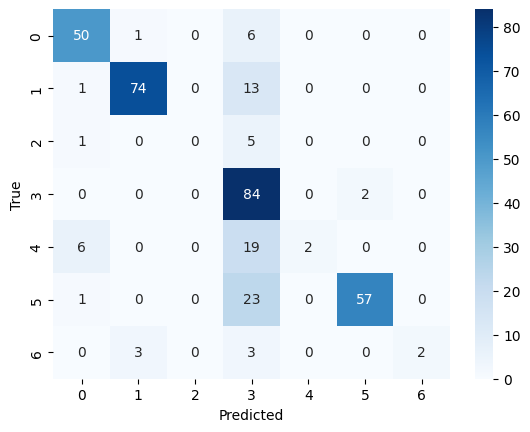

In [18]:
print("SVM confusion matrix:")
cm=(confusion_matrix(y_test, svm_predictions))
# create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Classification Report

In [19]:
print("SVM classification report:")
print(classification_report(y_test, svm_predictions))

SVM classification report:
               precision    recall  f1-score   support

     accounts       0.85      0.88      0.86        57
        cards       0.95      0.84      0.89        88
fundstransfer       0.00      0.00      0.00         6
    insurance       0.55      0.98      0.70        86
  investments       1.00      0.07      0.14        27
        loans       0.97      0.70      0.81        81
     security       1.00      0.25      0.40         8

     accuracy                           0.76       353
    macro avg       0.76      0.53      0.54       353
 weighted avg       0.83      0.76      0.74       353



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Applying NavieBayes Algorithm

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [21]:
# Define the hyperparameter grid to search
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False],
}

# Create the Multinomial Naive Bayes model
mnb = MultinomialNB()
# Perform grid search with cross-validation
grid_search = GridSearchCV(mnb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Get the best model and make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

Accuracy score: 0.9065155807365439


In [22]:
nb_predictions = best_model.predict(X_test)

In [23]:
nb_accuracy = accuracy_score(y_test, nb_predictions)

In [24]:
print("Naive Bayes accuracy:", nb_accuracy)

Naive Bayes accuracy: 0.9065155807365439


Naive Bayes confusion matrix:


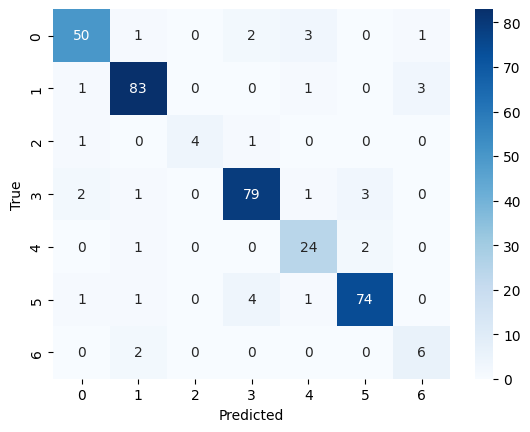

In [25]:
print("Naive Bayes confusion matrix:")
cm=(confusion_matrix(y_test, nb_predictions))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [26]:
# Print the classification report and confusion matrix for Naive Bayes model
print("Naive Bayes classification report:")
print(classification_report(y_test, nb_predictions))

Naive Bayes classification report:
               precision    recall  f1-score   support

     accounts       0.91      0.88      0.89        57
        cards       0.93      0.94      0.94        88
fundstransfer       1.00      0.67      0.80         6
    insurance       0.92      0.92      0.92        86
  investments       0.80      0.89      0.84        27
        loans       0.94      0.91      0.92        81
     security       0.60      0.75      0.67         8

     accuracy                           0.91       353
    macro avg       0.87      0.85      0.85       353
 weighted avg       0.91      0.91      0.91       353



# predictions

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
input_question = "What is the min-max age at entry/maturity"
input_vector = vectorizer.transform([input_question])
predicted_class = best_model.predict(input_vector)[0]
class_data = df[df['Class'] == predicted_class]
class_vectors = vectorizer.transform(class_data['Question'])
similarities = cosine_similarity(input_vector, class_vectors)
most_similar_index = similarities.argmax()
predicted_answer = class_data.iloc[most_similar_index]['Answer']

# Print the predicted class and answer
print("Predicted class:", predicted_class)
print("Predicted answer:", predicted_answer)

Predicted class: insurance
Predicted answer: Click here to view the min-max age at entry/maturity
